In [88]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)
import matplotlib.pyplot as plt
import seaborn as sns

# Question 8 -
```
Using the data from Question 5, write code the analyze the data and answer the following questions 
Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations 
2. Write code comments wherever required for code understanding
Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season
```

In [89]:
df = pd.read_csv("tv_series.csv")

In [90]:
df.shape

(36, 14)

In [91]:
df.head(2)

,Unnamed: 0,id,url,name,season,number,type,airdate,airtime,runtime,rating,summary,medium_image_link,original_image_link
0,0,869671,https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original,The Original,1,1,regular,2016-10-02,2023-06-06 21:00:00,68.0,8.0,"A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.",https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg,https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
1,1,911201,https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut,Chestnut,1,2,regular,2016-10-09,2023-06-06 21:00:00,60.0,7.7,"Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.",https://static.tvmaze.com/uploads/images/medium_landscape/78/195436.jpg,https://static.tvmaze.com/uploads/images/original_untouched/78/195436.jpg


### Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

In [92]:
season_df = df.groupby(["season"])["rating"].mean().reset_index()

In [93]:
season_df

,season,rating
0,1,8.0900
1,2,8.0000
2,3,7.7750
3,4,7.5375


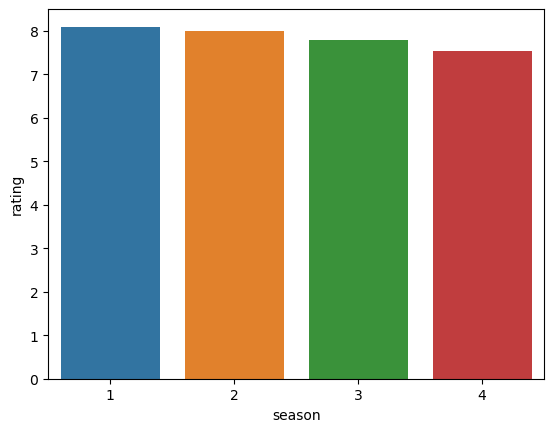

In [94]:
sns.barplot(x='season' , y='rating' , data=season_df )
plt.show()

### Get all the episode names, whose average rating is more than 8 for every season

In [95]:
df[df["rating"]<8]["name"].values

array(['Chestnut', 'The Stray', 'Dissonance Theory', 'Trace Decay',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'Akane No Mai',
       'Phase Space', 'Les Écorchés', 'The Winter Line',
       'The Absence of Field', 'Genre', 'Decoherence', 'Passed Pawn',
       'Crisis Theory', 'The Auguries', 'Well Enough Alone',
       'Années Folles', 'Generation Loss', 'Zhuangzi', 'Fidelity',
       'Metanoia', 'Que Será, Será'], dtype=object)

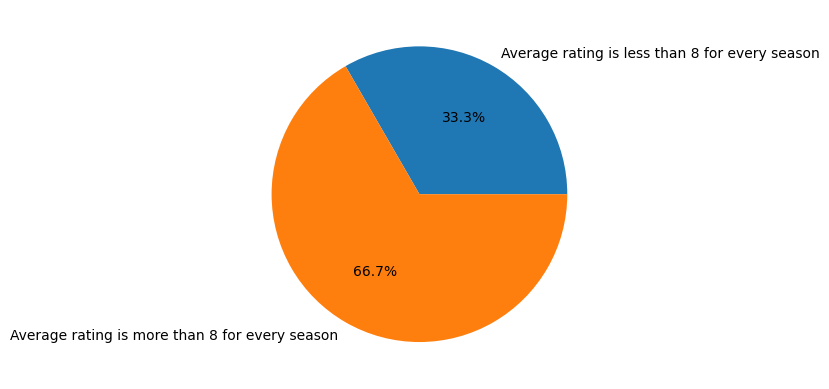

In [96]:
sizes = [(len(list(df["name"].values)))-(len(df[df["rating"]<8]["name"].values)), len(df[df["rating"]<8]["name"].values)]
labels = ['Average rating is less than 8 for every season', 'Average rating is more than 8 for every season']
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

### Get all the episode names that aired before May 2019

In [97]:
df["air_year"] = df["airdate"].apply(lambda x: int(x.split("-")[0]) if isinstance(x, str) else 0)

In [98]:
df[df["air_year"]<2019]["name"].values

array(['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory',
       'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay',
       'The Well-Tempered Clavier', 'The Bicameral Mind',
       'Journey Into Night', 'Reunion', 'Virtù e Fortuna',
       'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space',
       'Les Écorchés', 'Kiksuya', 'Vanishing Point', 'The Passenger'],
      dtype=object)

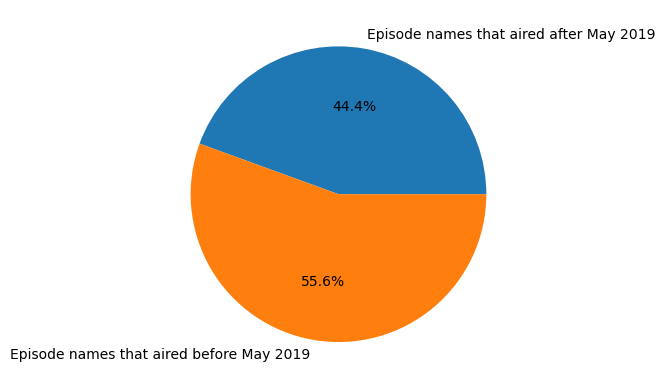

In [99]:
sizes = [(len(list(df["name"].values)))-(len(df[df["air_year"]<2019]["name"].values)), len(df[df["air_year"]<2019]["name"].values)]
labels = ['Episode names that aired after May 2019', 'Episode names that aired before May 2019']
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

### Get the episode name from each season with the highest and lowest rating

In [100]:
rating_max = df.groupby(["season"]).agg({"rating": "max"}).reset_index()

In [101]:
rating_max

,season,rating
0,1,8.7
1,2,8.7
2,3,8.0
3,4,7.8


In [102]:
rating = list(rating_max["rating"].values) # ratings as list

for i in range(1, len(rating)+1):
    print(f'Season {i}: {df[(df["season"]==i) & (df["rating"]==rating[i-1])]["name"].values[0]}')

Season 1: The Bicameral Mind
Season 2: Kiksuya
Season 3: Parce Domine
Season 4: Zhuangzi


In [103]:
rating_min = df.groupby(["season"]).agg({"rating": "min"}).reset_index()

In [104]:
rating_min

,season,rating
0,1,7.6
1,2,7.6
2,3,7.5
3,4,7.1


In [105]:
rating = list(rating_min["rating"].values) # ratings as list

for i in range(1, len(rating)+1):
    print(f'Season {i}: {df[(df["season"]==i) & (df["rating"]==rating[i-1])]["name"].values[0]}')

Season 1: The Stray
Season 2: Akane No Mai
Season 3: Decoherence
Season 4: The Auguries


### Get the summary for the most popular ( ratings ) episode in every season

In [106]:
li = rating_max["rating"].values
for i in range(len(li)):
    summary = df[(df["rating"]==li[i])&(df["season"]==i+1)]["summary"].values[0]
    print(f"Season {i+1}: {summary}\n")

Season 1: Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.

Season 2: Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.

Season 3: If you're stuck in a loop, try walking in a straight line.

Season 4: God is bored.

